In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("Social_Network_Ads.csv")

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [8]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
dummyDF = pd.get_dummies(data.Gender)

In [10]:
remainingDF = data.iloc[:,[0,2,3,4]]

In [12]:
dummyDF.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [13]:
remainingDF.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [15]:
final_data = pd.concat([dummyDF,remainingDF],axis = 1 )
final_data.head()

,Female,Male,User ID,Age,EstimatedSalary,Purchased
0,0,1,15624510,19,19000,0
1,0,1,15810944,35,20000,0
2,1,0,15668575,26,43000,0
3,1,0,15603246,27,57000,0
4,0,1,15804002,19,76000,0


In [16]:
final_data.Purchased.unique()

array([0, 1])

In [18]:
final_data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [19]:
features = final_data.iloc[:,[3,4]].values
label = final_data.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state = 10)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
model.score(X_train,Y_train)

0.640625

In [24]:
model.score(X_test,Y_test)

0.65

In [25]:
model.intercept_

array([-0.00131729])

In [26]:
model.coef_

array([[-3.47799543e-03, -1.18193842e-06]])

In [31]:
model.predict(np.array([[23,87655554]]))

array([0])

In [33]:
model.predict_proba(np.array([[23,87654]]))

array([[0.54609693, 0.45390307]])

In [36]:
Y_predict_test=model.predict_proba(X_test)
Y_predict_test[0:5]

array([[0.55582111, 0.44417889],
       [0.55327717, 0.44672283],
       [0.56310361, 0.43689639],
       [0.55486178, 0.44513822],
       [0.53445636, 0.46554364]])

In [37]:
Y_final_pred = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0)

In [38]:
Y_final_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 7,
                             metric = 'minkowski',
                             p = 2)
model2.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [42]:
print(model2.score(X_train,Y_train))
print(model2.score(X_test,Y_test))

0.84375
0.875


In [48]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model2.predict(X_test))
cm

array([[48,  4],
       [ 6, 22]])

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model.predict(X_test))
cm

array([[52,  0],
       [28,  0]])

In [45]:
data.Purchased.unique()

array([0, 1])

In [46]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

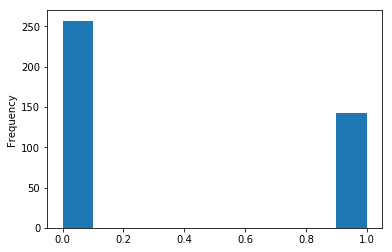

In [47]:
data.Purchased.plot.hist()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,model.predict(X_test)))
print(classification_report(Y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

   micro avg       0.65      0.65      0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

   micro avg       0.88      0.88      0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,model.predict(X_test)))
print(accuracy_score(Y_test,model2.predict(X_test)))

0.65
0.875


In [52]:
from sklearn.tree import DecisionTreeClassifier
model_classifier = DecisionTreeClassifier()
model_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
print(model_classifier.score(X_train,Y_train))
print(model_classifier.score(X_test,Y_test))

0.99375
0.85


In [54]:
from sklearn.ensemble import RandomForestClassifier
modelRC = RandomForestClassifier()
modelRC.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
print(modelRC.score(X_train,Y_train))
print(modelRC.score(X_test,Y_test))

0.984375
0.85
